In [1]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file1 = 'reproject-output2_sci.fits'
file2 = 'reproject-interp-output_sci.fits'
hdul1 = fits.open(file1)
hdul2 = fits.open(file2)
file1wht = 'reproject-output2_wht.fits'
hdul1wht = fits.open(file1wht)

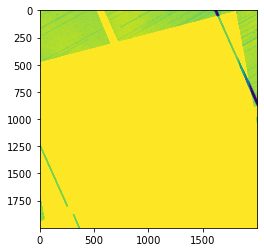

In [3]:
#plot weight image over a subsection at center of image
data1wht = hdul1wht[0].data
plt.imshow(data1wht[2000:4000,2000:4000],vmin=0,vmax = 20000.)
plt.show()
#would be nice to have a colorbar
#would be nice to make image bigger on screen

C:\Users\mende\AppData\Local\Temp\ipykernel_6756\1239667990.py:14: RuntimeWarning: invalid value encountered in true_divide
  datadiffperc = np.divide(datadiff, data1)


percent difference =  1.5759058745885786
median =  -4.91295769809223e-12


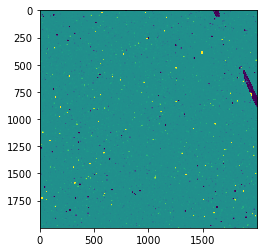

In [4]:
#plot data from image 1
data1 = hdul1[0].data
plt.imshow(data1[2000:4000,2000:4000], vmin=0, vmax = 0.01)
#plt.show()

#plot data from image 2
data2 = hdul2[0].data
plt.imshow(data2[2000:4000,2000:4000], vmin=0, vmax = 0.01)
#plt.show()

#take percentage differece
goodflag = data1wht>0
datadiff = data2 - data1
datadiffperc = np.divide(datadiff, data1)

#statistics on the difference image
print('percent difference = ', np.average(datadiffperc[goodflag])*100)
print('median = ', np.median(datadiffperc[goodflag]))
plt.imshow(datadiffperc[2000:4000,2000:4000], vmin=-1, vmax = 1)
plt.show()

In [7]:
prime_hdu = fits.PrimaryHDU(datadiffperc)
prime_hdu.writeto('data_diff.fits')